setting up the framework to develop and backtest algorithms

## Basic strategies to implement

### Simple moving averages (SMA)
when the moving average over a longer period of time crosses the moving average over a shorter period of time, that's our indicator.

### momentum
recent performance been up in the last say 4 days then it'll probably be up today also

### mean reversion
if sotck is above/below the mean it'll probably revert and approach the mean/moving average


# Vectorized Implementation
we will make some predetermined simplifications so that i have more focus on the practice of vectorization

### simple trading strategies
vectorized backtesting has limitations when it comes to backtesting, however, simple strategies can be tested well

### interactive strategy exploration
this vectorized backtesting allows for us to quickly explore trading strategies and their characteristics, parameters can then also be swapped out

### visualization as a goal
this approach lends itself well to being able to create visualizations of the data we are working with

### also it's fast!

going to be based on two indices which track gold

In [12]:
import pandas as pd
import numpy as np

In [ ]:
raw = pd.read_csv("data/aiif_eikon_eod_data.csv", index_col=0, parse_dates=True).dropna()



In [19]:
data = pd.DataFrame(raw["GDX"])

In [20]:
data.rename(columns={"GDX": "price"}, inplace=True)
data['returns'] = np.log(data['price'] / data['price'].shift(1)) # returns = (today/yesterday)

In [21]:
SMA = 25

data['SMA'] = data['price'].rolling(SMA).mean()
data['SMA'] = data['SMA'].shift(1) # shift to avoid lookahead bias


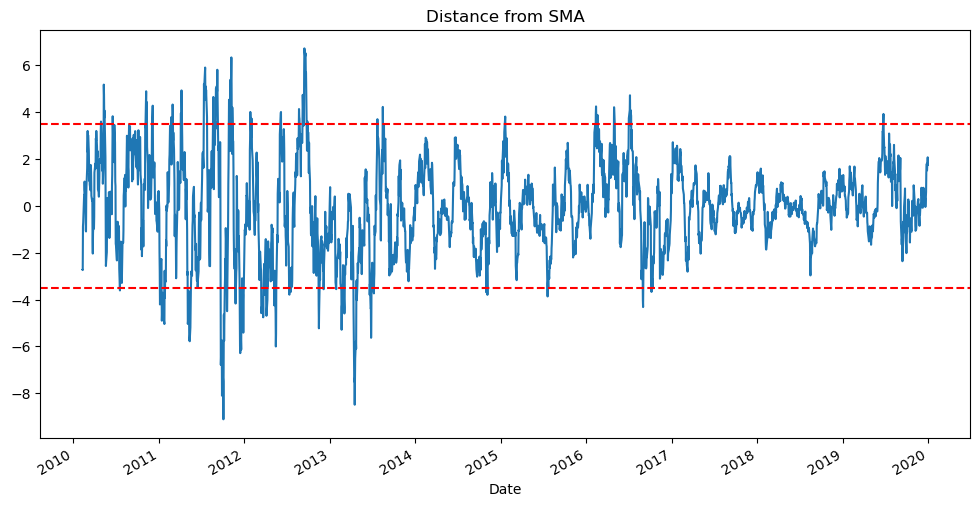

In [24]:
threshold = 3.5
data["distance"] = data["price"] - data["SMA"]


from pylab import plt, mpl
# plot distance with threshold
data["distance"].plot(title="Distance from SMA", figsize=(12, 6))
plt.axhline(threshold, color='red', linestyle='--')
plt.axhline(-threshold, color='red', linestyle='--')

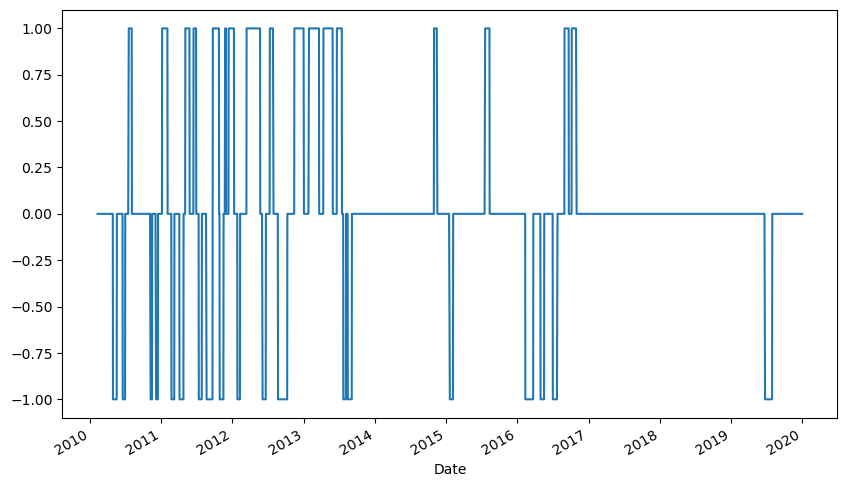

In [ ]:

# if the distance is greater than the threshold, we go short
data["position"] = np.where(data["distance"] > threshold, -1, np.nan)

# if the distance is less than the negative threshold, we go long
data["position"] = np.where(data['distance'] < -threshold, 1, data['position'])

# if there is a change in sign, go neutral
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])

# clean up
data['position'] = data['position'].ffill().fillna(0)

data['position'].iloc[SMA:].plot(ylim=[-1.1, 1.1],figsize=(10, 6))

<Axes: xlabel='Date'>

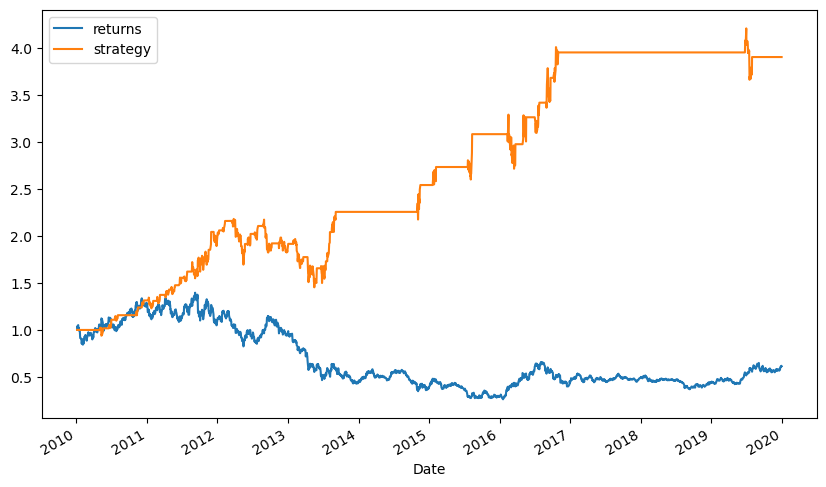

In [29]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))